In [1]:
import anndata as ad
import scanpy as sc
from sklearn.model_selection import train_test_split
import pylab as pl
import seaborn as sns
from limix_core.util.preprocess import gaussianize, regressOut
import scipy.stats as st
from sklearn.impute import SimpleImputer
import scipy.linalg as la
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from os.path import join
from mtgwas import VCTEST
from mtgwas.utils import df_match


/Users/dennyal/miniforge3/envs/tcf7l2/lib/python3.13/site-packages/limix_core/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound as _DistributionNotFound


In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
tissue = 'Organoid'
outdir = f'visualization/{tissue}'
os.makedirs(outdir, exist_ok=True)

In [6]:
#Reading the anndata
hfile = f"../../organoid_anndata.h5ad"
idata = ad.read_h5ad(hfile)

/Users/dennyal/miniforge3/envs/tcf7l2/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
idata.obs_names = idata.obs["SampleBarcode"]

/Users/dennyal/miniforge3/envs/tcf7l2/lib/python3.13/site-packages/anndata/_core/anndata.py:812: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    ['AS0033-02-MMR-001', 'AS0033-02-MMR-001', 'AS0051-03-MCS-001', 'AS0051-03-MCS-001', 'AS0009-03-MCS-007']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "obs")


In [8]:
na_series = idata.obs['edit_id'].isna()

bool_series = idata.obs['Day'] == 30

combined_series = bool_series & ~na_series

In [9]:
day30 = ad.AnnData(X = idata.X[combined_series], obs = idata.obs[combined_series], var = idata.var)

/Users/dennyal/miniforge3/envs/tcf7l2/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [10]:
dfX = day30.to_df()

In [11]:
dfX = dfX.groupby(["SampleBarcode"]).mean()

/var/folders/mr/zvvy4g790mz914r9cm23_92rl3zggr/T/ipykernel_44928/3343909998.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfX = dfX.groupby(["SampleBarcode"]).mean()


In [12]:
dfX

Feature Name,MinDiameter_shape,MaxDiameter_shape,MeanDiameter_shape,Area_shape,Perimeter_shape,MinDiameter_um_shape,MaxDiameter_um_shape,MeanDiameter_um_shape,Area_um^2_shape,Perimeter_um_shape,...,MinDiameter_um_halo,MaxDiameter_um_halo,MeanDiameter_um_halo,Perimeter_um_halo,FormFactor_halo,Solidity_halo,Extent_halo,Eccentricity_halo,Orientation_halo,Compactness_halo
SampleBarcode,,,,,,,,,,,,,,,,,,,,,
AS0009-02-MCS-001,0.354112,0.475818,0.456748,0.497349,0.241131,0.354112,0.475819,0.456748,0.497349,0.241131,...,-0.031601,0.286411,-0.344464,-0.051844,-0.177804,-0.433031,-0.659164,0.453020,0.290800,-0.066974
AS0009-02-MCS-002,0.753380,0.726113,0.823719,0.868929,0.461039,0.753380,0.726113,0.823719,0.868929,0.461039,...,-0.401583,-0.302994,-0.167374,-1.040774,0.862077,-0.158254,-0.185191,-0.270666,-0.121328,-0.069270
AS0009-02-MCS-003,1.090232,0.993282,1.200799,1.390768,0.667136,1.090232,0.993282,1.200799,1.390768,0.667136,...,-0.334537,-0.956531,0.240747,-1.587523,1.977799,-0.270072,-0.012228,-1.030658,0.325470,-0.052095
AS0009-02-MCS-004,1.096737,1.032913,1.219240,1.444516,0.670541,1.096737,1.032913,1.219240,1.444516,0.670541,...,-0.044366,-0.562936,0.166469,-0.799064,0.543433,-0.358119,-0.171405,-0.631112,-0.301227,-0.059961
AS0009-02-MCS-005,1.107613,1.173112,1.293388,1.562298,0.806641,1.107613,1.173112,1.293388,1.562298,0.806641,...,0.000697,-0.404737,0.229950,-0.777139,0.354873,-0.674803,-0.562669,-0.262804,-0.068770,-0.039405
AS0009-02-MCS-006,-0.610314,-0.374332,-1.104907,-0.744541,-0.871907,-0.610314,-0.374332,-1.104907,-0.744541,-0.871907,...,-1.516209,-0.982379,-2.408520,-0.114364,0.373787,1.199294,0.763248,0.299628,-0.201588,-0.104811
AS0009-02-MMR-001,0.900447,0.882686,0.917475,0.992483,1.002918,0.900447,0.882686,0.917475,0.992483,1.002918,...,-0.277736,-0.618262,0.352555,-1.252809,0.873080,-0.693328,-0.494599,-0.094346,0.662836,-0.034570
AS0009-02-MMR-002,0.211304,0.262269,0.244019,0.155600,0.050548,0.211304,0.262269,0.244019,0.155600,0.050548,...,-0.478208,0.185267,-0.606775,-0.069944,-0.234419,-0.401427,-0.600144,0.642202,-0.040768,-0.070982
AS0009-02-MMR-003,0.574901,0.438054,0.589516,0.555684,0.207208,0.574901,0.438054,0.589516,0.555685,0.207208,...,0.188918,0.060524,-0.144484,0.471853,-0.556136,-0.587852,-0.530623,0.463267,-0.107720,-0.067322


In [13]:
# Simulate a trait to visualize its direction
# snp_df = pd.DataFrame(np.random.rand(dfX.shape[0], 1))
# snp_df.index = dfX.index
trait = "Area_um^2_shape"
snp_df = pd.DataFrame(np.asarray(dfX[trait]))
snp_df.index = dfX.index


In [14]:
X = dfX.values
y = snp_df.values
F = np.zeros((dfX.shape[0], 1))

In [15]:
#regressing out the covariates from the embeddings
yr = regressOut(y, F)
Xr = regressOut(X, F)

In [115]:
Xr

array([[ 0.35411185,  0.47581849,  0.45674825, ...,  0.45301998,
         0.29079989, -0.06697436],
       [ 0.75338   ,  0.72611302,  0.82371879, ..., -0.27066585,
        -0.12132768, -0.06927001],
       [ 1.09023213,  0.9932816 ,  1.20079911, ..., -1.03065801,
         0.32547048, -0.05209451],
       ...,
       [-1.38513279, -1.23944175, -1.37391651, ...,  0.36205742,
        -0.22995441, -0.07506142],
       [-0.35929772, -0.30779415, -0.32910922, ...,  0.10448773,
        -0.193404  , -0.06683711],
       [-0.87432104, -0.88460147, -0.82394278, ...,  0.0486621 ,
        -0.10024415, -0.07381321]], shape=(54, 171))

In [16]:
# fit variant component model
vc = VCTEST()
res = vc.fit(Xr, yr, compute_pvals=True, normalize_X=False)
ystar = vc.predict_loo()

100%|██████████| 100/100 [00:00<00:00, 12177.17it/s]


In [17]:
res

,idx,beta,vg,vn,delta,sigma2,lml,lml0,llr,pvals,qvals
99,0,-0.001596,0.00046,4.599116e-08,0.9999,0.00046,175.644563,-66.18596,241.830523,0.090909,0.090909


In [18]:
# getting direction for each of the images
day30.obs['ystar'] = vc.predict(day30.X).ravel()

# Working on PGAN for interpolation

### Note below interpolation was done on simulated trait

In [19]:
import sys

from torchvision.utils import make_grid
import json
from PIL import Image
from torchvision.transforms.functional import pil_to_tensor, to_pil_image
import torch
os.chdir('..')
from models.progressive_gan import ProgressiveGAN as PGAN

In [20]:
class Generator():
    
    def __init__(self, config, checkpoint, useGPU=True):
        with open(config, 'rb') as file:
            config = json.load(file)
        self.pgan = PGAN(useGPU=useGPU, storeAVG=True, **config)
        self.pgan.load(checkpoint)
        self.netG = self.pgan.netG
        self.device = self.pgan.device
        
    def forward(self, x, eps=None):
        if eps is None:
            eps = torch.randn(x.shape[0], 512)
        if type(x)==np.ndarray:
            x = torch.Tensor(x)
        if type(eps)==np.ndarray:
            eps = torch.Tensor(eps)
        x = x.to(self.device)
        eps = eps.to(self.device)
        with torch.no_grad():
            out = self.netG(eps, x).data.cpu()
            out = 0.5 * (out + 1)
            out = torch.clip(out, 0, 1)
        return out
    
def load_image_torch(path, size):
    if type(path) in [list, np.ndarray]:
        return torch.cat([load_image_torch(_, size) for _ in path])
    return pil_to_tensor(Image.open(path).resize((size, size)))[None] / 255.


def torch_imshow(x):
    pl.imshow(x.permute(1, 2, 0))

In [44]:
config = '/Users/dennyal/Desktop/repos/HistoGWAS_PGAN/PGAN/config/config_OrganoidLocal.json'
checkpoint = '/Users/dennyal/Desktop/Organoid/Organoid_s6_i736000.pt'
#checkpoint = '/Users/dennyal/Desktop/repos/Organoid_s6_i320000.pt'
generator = Generator(config, checkpoint, useGPU=True)

here False
Average network found !


In [45]:
# Getting the top and the bottom embedding to be used for interpolation

outliers = 0.01
extreme = 0.05
q1, q2, Q1, Q2 = np.quantile(day30.obs['ystar'].values, [outliers, extreme, 1 - extreme, 1 - outliers])
Ih1 = np.logical_and(day30.obs['ystar'].values>Q1, day30.obs['ystar'].values<Q2)
Il1 = np.logical_and(day30.obs['ystar'].values>q1, day30.obs['ystar'].values<q2)

# interpolates
emb1 = day30.X[Il1].mean(0)[None]
emb2 = day30.X[Ih1].mean(0)[None]

0.95

In [30]:
day30.obs[Ih1]

,Day,Well,Well literal,Sample_barcode,Plate,Cell_density,Run_ID,path,SampleBarcode,edit_id,ystar
SampleBarcode,,,,,,,,,,,
AS0033-02-MCS-002,30,r03c16,C16,AS0033-02-MCS-002,101,40k,NIHB123,/data/Collinslab/tcf7l2/nyscf-organoid-images-...,AS0033-02-MCS-002,-/-,1.949206
AS0033-02-MCS-002,30,r04c16,D16,AS0033-02-MCS-002,101,40k,NIHB123,/data/Collinslab/tcf7l2/nyscf-organoid-images-...,AS0033-02-MCS-002,-/-,1.726735
AS0009-02-MCS-005,30,r09c20,I20,AS0009-02-MCS-005,101,40k,NIHB123,/data/Collinslab/tcf7l2/nyscf-organoid-images-...,AS0009-02-MCS-005,WT/-,2.159677
AS0033-02-MCS-004,30,r13c03,M3,AS0033-02-MCS-004,101,40k,NIHB123,/data/Collinslab/tcf7l2/nyscf-organoid-images-...,AS0033-02-MCS-004,WT/-,1.639840
AS0033-02-MCS-002,30,r04c15,D15,AS0033-02-MCS-002,102,40k,NIHB123,/data/Collinslab/tcf7l2/nyscf-organoid-images-...,AS0033-02-MCS-002,-/-,1.631311
AS0051-02-MCS-001,30,r08c09,H9,AS0051-02-MCS-001,102,40k,NIHB123,/data/Collinslab/tcf7l2/nyscf-organoid-images-...,AS0051-02-MCS-001,-/-,1.655739
AS0009-02-MCS-005,30,r07c04,G4,AS0009-02-MCS-005,101,40k,NIHB127,/data/Collinslab/tcf7l2/nyscf-organoid-images-...,AS0009-02-MCS-005,WT/-,2.267035
AS0033-02-MCS-005,30,r07c09,G9,AS0033-02-MCS-005,101,40k,NIHB127,/data/Collinslab/tcf7l2/nyscf-organoid-images-...,AS0033-02-MCS-005,WT/-,1.885219
AS0033-02-MCS-005,30,r07c10,G10,AS0033-02-MCS-005,101,40k,NIHB127,/data/Collinslab/tcf7l2/nyscf-organoid-images-...,AS0033-02-MCS-005,WT/-,1.969470


In [46]:
os.chdir("/Users/dennyal/Desktop/repos/HistoGWAS_PGAN/PGAN/Notebooks")
for i in range(1):   # This are different realization of the same embedding
    inter = np.linspace(0, 1, 8)[:, None]
    Embs = emb1 * (1 - inter) + emb2 * inter
    print(np.ones([Embs.shape[0], 1]).shape)
    Eps = np.random.randn(1, 512) * np.ones([Embs.shape[0], 1])
    print(Eps.shape)
    Xinter = generator.forward(Embs, Eps)
    print("here",Xinter.shape)
    
    outdir_temp = join(outdir, f'realization_{i}')
    os.makedirs(outdir_temp, exist_ok=True)
    images = []
    for idx,img in enumerate(Xinter):
        print(idx)
        print(img.shape)
        img = to_pil_image(img)
        outfile = join(outdir_temp, f'{idx}_{tissue}.PNG')
        
        images.append(img)
    images_forward = images
    images_backward = images[::-1]  # Reverse the order of frames

    looped_frames = images_forward + images_backward[1:]
    
    
    os.makedirs(outdir, exist_ok=True)
    gif_file = f"{tissue}_interpolation_Day30__{trait}{i}.gif"
    outfile = join(outdir, gif_file)
    looped_frames[0].save(outfile, save_all=True, append_images=looped_frames[1:], loop=0)

  
    
Xinter_grid = make_grid(Xinter, nrow=8)

(8, 1)
(8, 512)
here torch.Size([8, 1, 256, 256])
0
torch.Size([1, 256, 256])
1
torch.Size([1, 256, 256])
2
torch.Size([1, 256, 256])
3
torch.Size([1, 256, 256])
4
torch.Size([1, 256, 256])
5
torch.Size([1, 256, 256])
6
torch.Size([1, 256, 256])
7
torch.Size([1, 256, 256])


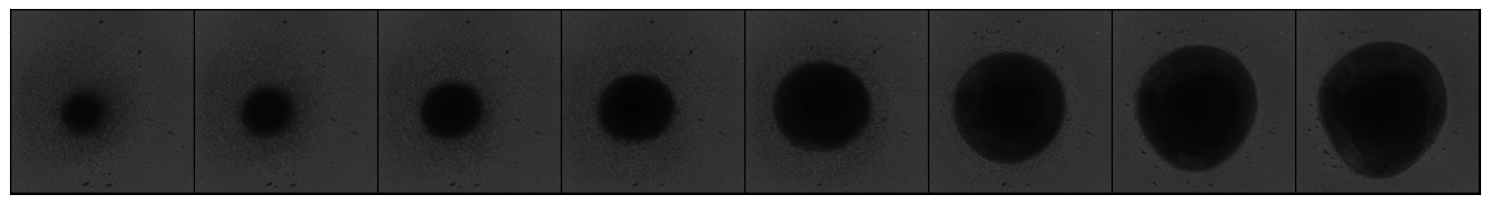

In [47]:
# Doing the projection
pl.figure(1, figsize=(15, 15))
plt = pl.subplot(111)
torch_imshow(Xinter_grid)
plt.set_xticks([])
plt.set_yticks([])
pl.tight_layout()
#pl.savefig(f'{figdir}/randomsamples.png', dpi=300)

In [36]:
dfX

Feature Name,MinDiameter_shape,MaxDiameter_shape,MeanDiameter_shape,Area_shape,Perimeter_shape,MinDiameter_um_shape,MaxDiameter_um_shape,MeanDiameter_um_shape,Area_um^2_shape,Perimeter_um_shape,...,MinDiameter_um_halo,MaxDiameter_um_halo,MeanDiameter_um_halo,Perimeter_um_halo,FormFactor_halo,Solidity_halo,Extent_halo,Eccentricity_halo,Orientation_halo,Compactness_halo
SampleBarcode,,,,,,,,,,,,,,,,,,,,,
AS0009-02-MCS-001,0.354112,0.475818,0.456748,0.497349,0.241131,0.354112,0.475819,0.456748,0.497349,0.241131,...,-0.031601,0.286411,-0.344464,-0.051844,-0.177804,-0.433031,-0.659164,0.453020,0.290800,-0.066974
AS0009-02-MCS-002,0.753380,0.726113,0.823719,0.868929,0.461039,0.753380,0.726113,0.823719,0.868929,0.461039,...,-0.401583,-0.302994,-0.167374,-1.040774,0.862077,-0.158254,-0.185191,-0.270666,-0.121328,-0.069270
AS0009-02-MCS-003,1.090232,0.993282,1.200799,1.390768,0.667136,1.090232,0.993282,1.200799,1.390768,0.667136,...,-0.334537,-0.956531,0.240747,-1.587523,1.977799,-0.270072,-0.012228,-1.030658,0.325470,-0.052095
AS0009-02-MCS-004,1.096737,1.032913,1.219240,1.444516,0.670541,1.096737,1.032913,1.219240,1.444516,0.670541,...,-0.044366,-0.562936,0.166469,-0.799064,0.543433,-0.358119,-0.171405,-0.631112,-0.301227,-0.059961
AS0009-02-MCS-005,1.107613,1.173112,1.293388,1.562298,0.806641,1.107613,1.173112,1.293388,1.562298,0.806641,...,0.000697,-0.404737,0.229950,-0.777139,0.354873,-0.674803,-0.562669,-0.262804,-0.068770,-0.039405
AS0009-02-MCS-006,-0.610314,-0.374332,-1.104907,-0.744541,-0.871907,-0.610314,-0.374332,-1.104907,-0.744541,-0.871907,...,-1.516209,-0.982379,-2.408520,-0.114364,0.373787,1.199294,0.763248,0.299628,-0.201588,-0.104811
AS0009-02-MMR-001,0.900447,0.882686,0.917475,0.992483,1.002918,0.900447,0.882686,0.917475,0.992483,1.002918,...,-0.277736,-0.618262,0.352555,-1.252809,0.873080,-0.693328,-0.494599,-0.094346,0.662836,-0.034570
AS0009-02-MMR-002,0.211304,0.262269,0.244019,0.155600,0.050548,0.211304,0.262269,0.244019,0.155600,0.050548,...,-0.478208,0.185267,-0.606775,-0.069944,-0.234419,-0.401427,-0.600144,0.642202,-0.040768,-0.070982
AS0009-02-MMR-003,0.574901,0.438054,0.589516,0.555684,0.207208,0.574901,0.438054,0.589516,0.555685,0.207208,...,0.188918,0.060524,-0.144484,0.471853,-0.556136,-0.587852,-0.530623,0.463267,-0.107720,-0.067322


In [79]:
# topEm = dfX[dfX['MaxDiameter_shape'] ==  dfX['MaxDiameter_shape'].max()]
# botEm = dfX[dfX['MaxDiameter_shape'] == dfX['MaxDiameter_shape'].min()]

topEm = dfX.loc[dfX.index == "WT/WT"]
botEm = dfX.loc[dfX.index == "-/-"]

In [37]:
botEm


NameError: name 'botEm' is not defined

In [81]:
topEm = topEm.to_numpy()
botEm = botEm.to_numpy()

In [82]:
topEm.shape
botEm.shape

(1, 171)

In [85]:
os.chdir("/Users/dennyal/Desktop/repos/HistoGWAS_PGAN/PGAN/Notebooks")
for i in range(1):   # This are different realization of the same embedding
    inter = np.linspace(0, 1, 3)[:, None]
    Embs = botEm * (1 - inter) + topEm * inter
    print(np.ones([Embs.shape[0], 1]).shape)
    Eps = np.random.randn(1, 512) * np.ones([Embs.shape[0], 1])
    print(Eps.shape)
    Xinter = generator.forward(Embs, Eps)
    print("here",Xinter.shape)
    
    outdir_temp = join(outdir, f'realization_{i}')
    os.makedirs(outdir_temp, exist_ok=True)
    images = []
    for idx,img in enumerate(Xinter):
        print(idx)
        print(img.shape)
        img = to_pil_image(img)
        outfile = join(outdir_temp, f'{idx}_{tissue}.PNG')
        
        images.append(img)
    images_forward = images
    images_backward = images[::-1]  # Reverse the order of frames

    looped_frames = images_forward + images_backward[1:]
    
    
    os.makedirs(outdir, exist_ok=True)
    gif_file = f"{tissue}_interpolation_Day30__{trait}ByEdit.gif"
    outfile = join(outdir, gif_file)
    looped_frames[0].save(outfile, save_all=True, append_images=looped_frames[1:], loop=0)

  
    
Xinter_grid = make_grid(Xinter, nrow=8)

(3, 1)
(3, 512)
here torch.Size([3, 1, 256, 256])
0
torch.Size([1, 256, 256])
1
torch.Size([1, 256, 256])
2
torch.Size([1, 256, 256])


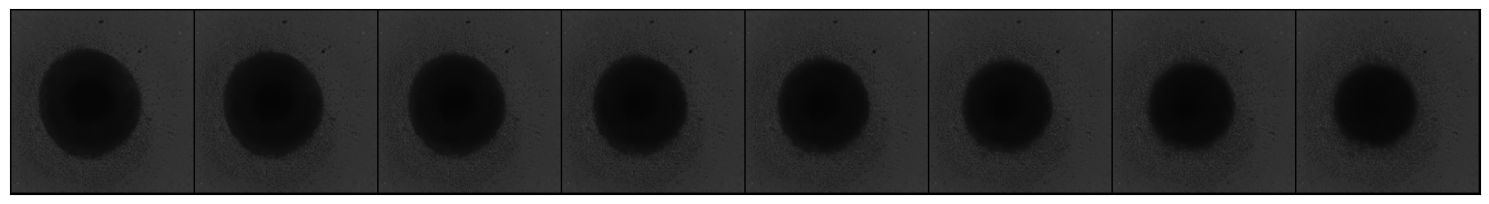

In [84]:
pl.figure(1, figsize=(15, 15))
plt = pl.subplot(111)
torch_imshow(Xinter_grid)
plt.set_xticks([])
plt.set_yticks([])
pl.tight_layout()